In [1]:
import finance4py as fp

import matplotlib.pyplot as plt
from matplotlib import pylab
import pandas as pd
import seaborn as sns

from pandas_datareader.data import DataReader

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)

/home/neuro/PycharmProjects/finance4py/env/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## finance4py plotting example
In this example I'm going to evaluate different indicator and plot them one using pyplot subplots.

In [2]:
# reading data from google finance
stock = DataReader('NFLX', 'google')

In [10]:
# extract bollinger bands
boll_bands = fp.bbands(stock.Close)
boll_bands.tail()

,bb_lower,bb_upper,close_average
Date,,,
2016-12-22,111.440,128.582,120.011
2016-12-23,111.726,128.974,120.350
2016-12-27,111.966,129.639,120.802
2016-12-28,112.656,129.783,121.219
2016-12-29,113.425,129.796,121.611


In [11]:
# extract average true range
atr = fp.average_true_range(stock.High, stock.Low, stock.Close)
atr.tail()

,TR1,TR2,TR3,TR,ATR
Date,,,,,
2016-12-22,2.32,1.00,1.32,2.32,3.006843
2016-12-23,1.20,0.70,0.50,1.20,2.877783
2016-12-27,3.35,3.46,0.11,3.46,2.919370
2016-12-28,3.31,0.72,2.59,3.31,2.947272
2016-12-29,1.94,0.25,1.69,1.94,2.875324


In [12]:
# extract RSI 
rsi = fp.rsi(stock.Close).to_frame()
rsi.head(10)

,Close
Date,
2010-01-04,NaN
2010-01-05,0.000000
2010-01-06,49.872123
2010-01-07,39.357024
2010-01-08,49.820639
2010-01-11,49.064759
2010-01-12,41.056008
2010-01-13,55.853834
2010-01-14,37.164595


In [13]:
# extract MACD
macd = fp.macd(stock.Close)
macd.tail()

,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
Date,,,
2016-12-22,4.283192,4.348190,-0.064999
2016-12-23,4.264121,4.339783,-0.075663
2016-12-27,4.345106,4.340316,0.004790
2016-12-28,4.306593,4.336943,-0.030350
2016-12-29,4.237755,4.327025,-0.089270


## Problems

There are some problems here:

- The price plot must be bigger than the other ones.
- The MACD plot must have a barplot inside
- I had problem plotting the volume as a barchart, altough I did't try hard to solve this one.

One possible solution could be, and I think this is how I'm going to implement it, to use the class StockDataFrame, in which every possible indicator should have the capability to plot itself in the appropriate way.

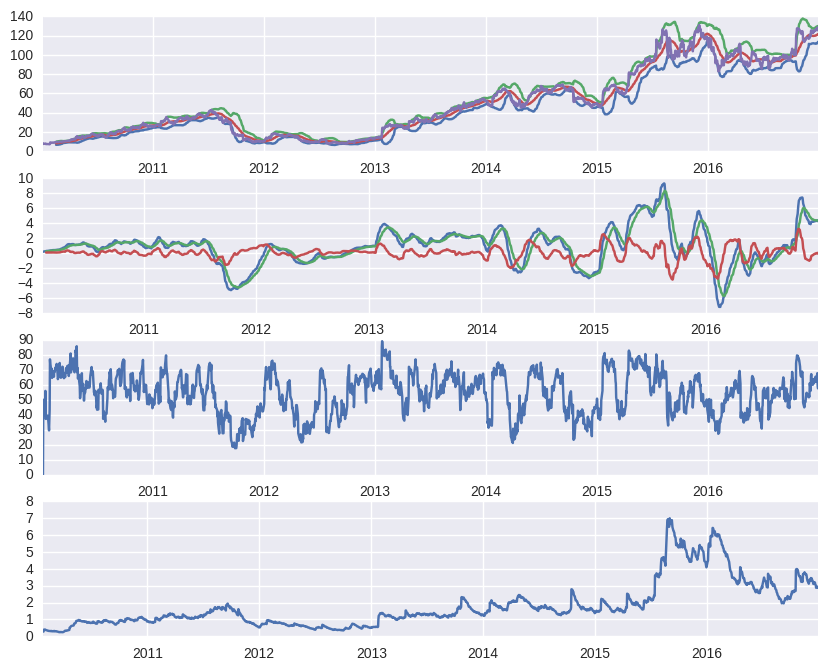

In [14]:
plt.figure(1)
plt.subplot(411)
plt.plot(boll_bands.join(stock.Close))

plt.subplot(412)
plt.plot(macd)

plt.subplot(413)
plt.plot(rsi)

plt.subplot(414)
plt.plot(atr['ATR'])